# 8. a)

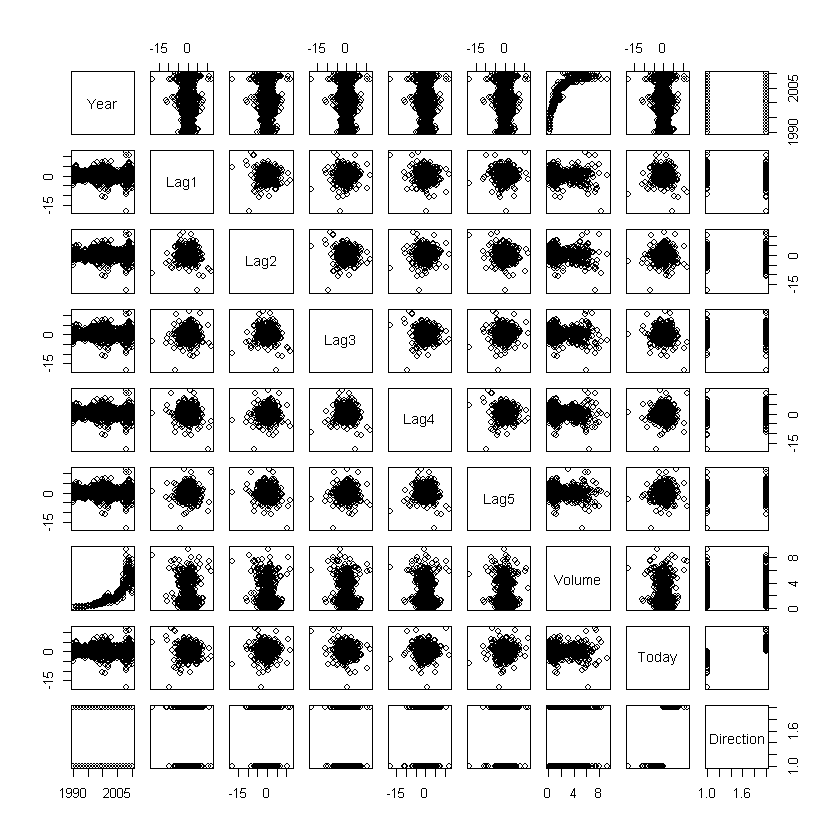

In [3]:
library(ISLR)
pairs(Weekly)

Year and volume have an exponential relationship. Clearly, the volume of trades has grown from 1990 to 2010. Otherwise, I don't notice any other clear patterns.

In [4]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [5]:
nums <- sapply(Weekly, is.numeric)
#selects all numeric columns in a given dataframe

cor(Weekly[,nums])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.03228927,-0.03339001,-0.03000649,-0.03112792,-0.03051910,0.84194162,-0.03245989
Lag1,-0.032289274,1.000000000,-0.074853051,0.058635682,-0.071273876,-0.008183096,-0.064951313,-0.075031842
Lag2,-0.03339001,-0.07485305,1.00000000,-0.07572091,0.05838153,-0.07249948,-0.08551314,0.05916672
Lag3,-0.03000649,0.05863568,-0.07572091,1.00000000,-0.07539587,0.06065717,-0.06928771,-0.07124364
Lag4,-0.031127923,-0.071273876,0.058381535,-0.075395865,1.000000000,-0.075675027,-0.061074617,-0.007825873
Lag5,-0.030519101,-0.008183096,-0.072499482,0.060657175,-0.075675027,1.000000000,-0.058517414,0.011012698
Volume,0.84194162,-0.06495131,-0.08551314,-0.06928771,-0.06107462,-0.05851741,1.00000000,-0.03307778
Today,-0.032459894,-0.075031842,0.059166717,-0.071243639,-0.007825873,0.011012698,-0.033077783,1.000000000


# 8. b)

In [16]:
fit1 <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(fit1)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Oddly enough, Lag 2 seems to be the only statistically significant variable other than the intercept.

# 8. c)

In [24]:
fit1Probs <- predict(fit1, type = "response")
fit1Pred <- rep("Down", length(fit1Probs))
fit1Pred[fit1Probs > 0.5] = "Up"
table(fit1Pred, Weekly$Direction)

        
fit1Pred Down  Up
    Down   54  48
    Up    430 557

The diagonal entries are correct predictions, so we calculate correctness overall by: (54 + 557)/(54 + 48 + 430 + 557) = 56.1%. 

The logistic regression is correct most of the time when it comes to predicting when the market goes up: 557/(48 + 557) = 92.1%. Unfortunately, it's pretty terrible at predicting when the market goes down, with a success rate of: 54/(430 + 54) = 11.2%.

In [43]:
trainingYears <- (Weekly$Year < 2009)
testSetWeekly <- Weekly[!trainingYears, ]
#fit2 <- glm(Direction ~ Lag2, data = Weekly, family = binomial, subset = train)
#fit2Probs <- predict(fit2, testSetWeekly, type = "response")
#fit2Pred <- rep("Down", length(testSetWeekly))
#fit2Pred[fit2Probs > 0.5] <- "Up"